In [176]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pdb

In [177]:
# transform to do random affine and cast image to PyTorch tensor
trans_ = torchvision.transforms.Compose(
    [
     # torchvision.transforms.RandomAffine(10),
     torchvision.transforms.ToTensor()]
)

# Setup the dataset
ds = torchvision.datasets.ImageFolder('data/mouth/train/',
                                     transform=trans_)

# Setup the dataloader
loader = torch.utils.data.DataLoader(ds, 
                                     batch_size=16, 
                                     shuffle=True)


torch.Size([16, 3, 200, 200])
torch.Size([16])
tensor([0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1])


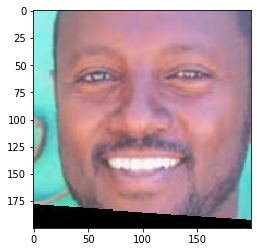

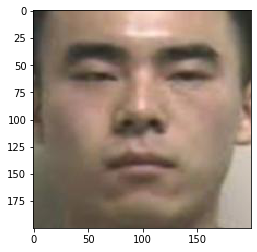

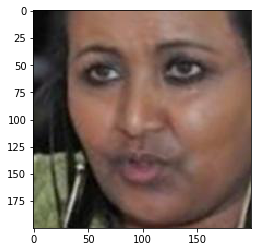

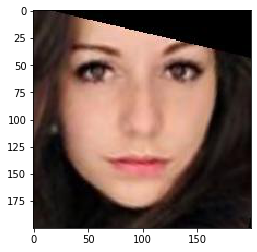

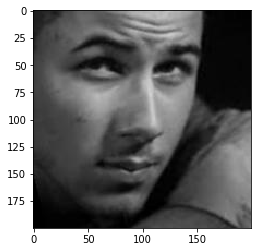

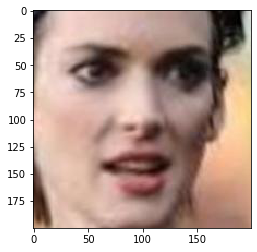

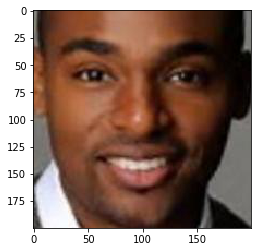

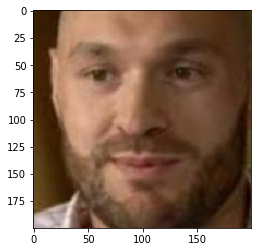

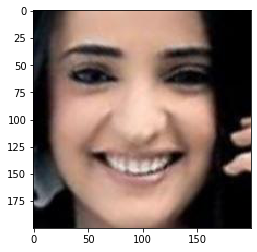

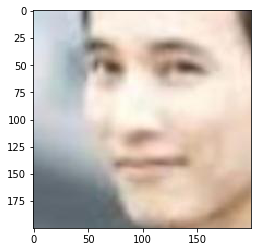

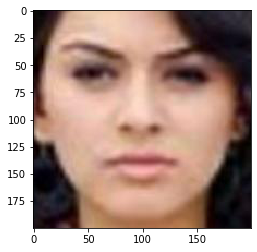

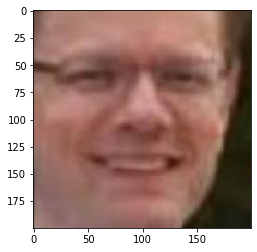

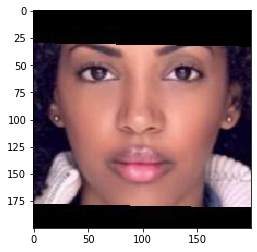

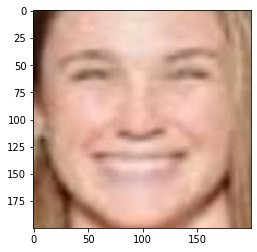

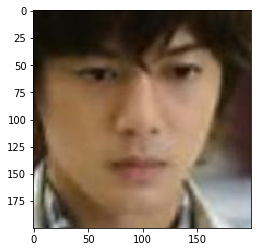

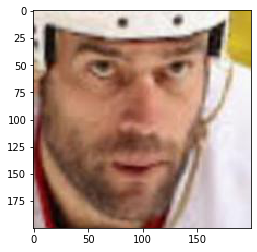

In [178]:
# [16, 3, 30, 30] = [batch size, channels, width, height]
for x, y in loader:
    print(x.shape)
    print(y.shape)
    print(y)
    break

# vis
for i in range(16):
    plt.imshow(np.transpose(x[i,:], (1,2,0))) # 30 x 30 x 3
    plt.show()

In [179]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # define the layers
        # kernel size = 3 means (3,3) kernel
        # rgb -> 3 -> in channel
        # number of feature maps = 16
        # number of filters = 3 x 16
        self.l1 = nn.Conv2d(kernel_size=3, in_channels=3, out_channels=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        # MaxPool2d, AvgPool2d. 
        # The first 2 = 2x2 kernel size, 
        # The second 2 means the stride=2
        
        self.l2 = nn.Conv2d(kernel_size=3, in_channels=16, out_channels=32)
        
        # FC layer
        self.fc1 = nn.Linear(32 * 48 * 48, 3) # NUM OF CLUSTER
        
    def forward(self, x):
        # define the data flow through the deep learning layers
        x = self.pool(F.relu(self.l1(x))) # 16x16 x 14 x 14
        #print(x.shape)
        x = self.pool(F.relu(self.l2(x))) # 16x32x6x6
        #print(x.shape)
        x = x.reshape(-1, 32*48*48) # [16 x 1152]# CRUCIAL: 
        #print(x.shape)
        x = self.fc1(x)
        return x

In [180]:
m = CNN()
pred = m(x)
print(pred.shape)

torch.Size([16, 3])


In [181]:
print(pred)

tensor([[ 1.5043e-01,  1.1852e-01,  4.2189e-02],
        [ 1.1023e-01,  1.2562e-01,  7.4243e-02],
        [ 1.0802e-01,  9.3943e-02,  4.7134e-02],
        [ 1.1849e-01,  1.1779e-01,  1.0701e-04],
        [ 9.1209e-02,  1.0300e-01,  1.6959e-02],
        [ 1.6004e-01,  1.5791e-01,  1.1102e-01],
        [ 1.1831e-01,  7.6626e-02,  6.2571e-02],
        [ 1.3323e-01,  1.2612e-01,  8.9712e-02],
        [ 1.2548e-01,  1.8914e-01,  3.0884e-02],
        [ 1.2927e-01,  1.6888e-01,  5.4155e-02],
        [ 1.4529e-01,  1.7863e-01,  4.3721e-02],
        [ 1.4004e-01,  1.4651e-01,  6.0410e-02],
        [ 1.6888e-01,  1.9005e-02, -3.4147e-02],
        [ 1.5538e-01,  1.6541e-01,  5.1055e-02],
        [ 1.5528e-01,  9.0369e-02, -7.4844e-04],
        [ 1.7416e-01,  1.2103e-01,  7.1961e-02]], grad_fn=<AddmmBackward>)


### Train data

In [182]:
criterion = nn.CrossEntropyLoss()
num_epoches = 10
import tqdm

import torch.optim as optim

In [ ]:
for epoch_id in range(num_epoches):
    optimizer = optim.SGD(m.parameters(), lr=0.01 * 0.95 ** epoch_id)
    for x, y in tqdm.tqdm(loader):
        optimizer.zero_grad() # clear (reset) the gradient for the optimizer
        pred = m(x)
        loss = criterion(pred, y)
        loss.backward() # calculating the gradient
        optimizer.step() # backpropagation: optimize the model




  0%|          | 0/710 [00:00<?, ?it/s]


  0%|          | 1/710 [00:00<04:00,  2.95it/s]


  0%|          | 2/710 [00:00<04:01,  2.93it/s]


  0%|          | 3/710 [00:01<04:01,  2.93it/s]


  1%|          | 4/710 [00:01<04:00,  2.93it/s]


  1%|          | 5/710 [00:01<04:00,  2.93it/s]


  1%|          | 6/710 [00:02<03:56,  2.98it/s]


  1%|          | 7/710 [00:02<03:54,  3.00it/s]


  1%|          | 8/710 [00:02<03:52,  3.02it/s]


  1%|▏         | 9/710 [00:03<03:53,  3.00it/s]


  1%|▏         | 10/710 [00:03<03:53,  2.99it/s]


  2%|▏         | 11/710 [00:03<03:54,  2.98it/s]


  2%|▏         | 12/710 [00:04<03:54,  2.98it/s]


  2%|▏         | 13/710 [00:04<03:54,  2.97it/s]


  2%|▏         | 14/710 [00:04<03:53,  2.99it/s]


  2%|▏         | 15/710 [00:05<03:53,  2.98it/s]


  2%|▏         | 16/710 [00:05<03:54,  2.96it/s]


  2%|▏         | 17/710 [00:05<03:52,  2.97it/s]


  3%|▎         | 18/710 [00:06<03:52,  2.98it/s]


  3%|▎         | 19/710 [00:06<03:53,  2.96it/

 19%|█▉        | 136/710 [00:46<03:15,  2.94it/s]


 19%|█▉        | 137/710 [00:46<03:16,  2.91it/s]


 19%|█▉        | 138/710 [00:46<03:14,  2.93it/s]


 20%|█▉        | 139/710 [00:47<03:13,  2.96it/s]


 20%|█▉        | 140/710 [00:47<03:11,  2.97it/s]


 20%|█▉        | 141/710 [00:47<03:11,  2.97it/s]


 20%|██        | 142/710 [00:48<03:10,  2.98it/s]


 20%|██        | 143/710 [00:48<03:09,  2.99it/s]


 20%|██        | 144/710 [00:48<03:09,  2.99it/s]


 20%|██        | 145/710 [00:49<03:09,  2.98it/s]


 21%|██        | 146/710 [00:49<03:09,  2.98it/s]


 21%|██        | 147/710 [00:49<03:10,  2.96it/s]


 21%|██        | 148/710 [00:50<03:09,  2.96it/s]


 21%|██        | 149/710 [00:50<03:09,  2.96it/s]


 21%|██        | 150/710 [00:50<03:09,  2.96it/s]


 21%|██▏       | 151/710 [00:51<03:08,  2.96it/s]


 21%|██▏       | 152/710 [00:51<03:08,  2.95it/s]


 22%|██▏       | 153/710 [00:51<03:07,  2.97it/s]


 22%|██▏       | 154/710 [00:52<03:06,  2.98it/s]


 22%|██▏    

 38%|███▊      | 270/710 [01:31<02:33,  2.86it/s]


 38%|███▊      | 271/710 [01:31<02:33,  2.86it/s]


 38%|███▊      | 272/710 [01:32<02:31,  2.89it/s]


 38%|███▊      | 273/710 [01:32<02:30,  2.90it/s]


 39%|███▊      | 274/710 [01:32<02:29,  2.92it/s]


 39%|███▊      | 275/710 [01:33<02:27,  2.94it/s]


 39%|███▉      | 276/710 [01:33<02:27,  2.94it/s]


 39%|███▉      | 277/710 [01:34<02:26,  2.95it/s]


 39%|███▉      | 278/710 [01:34<02:26,  2.95it/s]


 39%|███▉      | 279/710 [01:34<02:25,  2.97it/s]


 39%|███▉      | 280/710 [01:35<02:25,  2.96it/s]


 40%|███▉      | 281/710 [01:35<02:24,  2.97it/s]


 40%|███▉      | 282/710 [01:35<02:24,  2.97it/s]


 40%|███▉      | 283/710 [01:36<02:23,  2.97it/s]


 40%|████      | 284/710 [01:36<02:21,  3.01it/s]


 40%|████      | 285/710 [01:36<02:23,  2.97it/s]


 40%|████      | 286/710 [01:37<02:21,  3.00it/s]


 40%|████      | 287/710 [01:37<02:20,  3.01it/s]


 41%|████      | 288/710 [01:37<02:20,  3.00it/s]


 41%|████   

 57%|█████▋    | 404/710 [02:17<01:45,  2.91it/s]


 57%|█████▋    | 405/710 [02:18<01:44,  2.92it/s]


 57%|█████▋    | 406/710 [02:18<01:43,  2.95it/s]


 57%|█████▋    | 407/710 [02:18<01:42,  2.95it/s]


 57%|█████▋    | 408/710 [02:19<01:42,  2.94it/s]


 58%|█████▊    | 409/710 [02:19<01:41,  2.96it/s]


 58%|█████▊    | 410/710 [02:19<01:41,  2.97it/s]


 58%|█████▊    | 411/710 [02:20<01:39,  3.00it/s]


 58%|█████▊    | 412/710 [02:20<01:39,  2.99it/s]


 58%|█████▊    | 413/710 [02:20<01:40,  2.96it/s]


 58%|█████▊    | 414/710 [02:21<01:40,  2.94it/s]


 58%|█████▊    | 415/710 [02:21<01:40,  2.95it/s]


 59%|█████▊    | 416/710 [02:21<01:39,  2.94it/s]


 59%|█████▊    | 417/710 [02:22<01:40,  2.92it/s]


 59%|█████▉    | 418/710 [02:22<01:39,  2.92it/s]


 59%|█████▉    | 419/710 [02:22<01:39,  2.92it/s]


 59%|█████▉    | 420/710 [02:23<01:38,  2.94it/s]


 59%|█████▉    | 421/710 [02:23<01:38,  2.93it/s]


 59%|█████▉    | 422/710 [02:23<01:38,  2.93it/s]


 60%|█████▉ 

 76%|███████▌  | 538/710 [03:03<00:59,  2.89it/s]


 76%|███████▌  | 539/710 [03:03<00:59,  2.87it/s]


 76%|███████▌  | 540/710 [03:04<00:58,  2.89it/s]


 76%|███████▌  | 541/710 [03:04<00:58,  2.89it/s]


 76%|███████▋  | 542/710 [03:04<00:57,  2.91it/s]


 76%|███████▋  | 543/710 [03:05<00:56,  2.94it/s]


 77%|███████▋  | 544/710 [03:05<00:56,  2.96it/s]


 77%|███████▋  | 545/710 [03:05<00:55,  2.95it/s]


 77%|███████▋  | 546/710 [03:06<00:55,  2.96it/s]


 77%|███████▋  | 547/710 [03:06<00:55,  2.95it/s]


 77%|███████▋  | 548/710 [03:06<00:54,  2.96it/s]


 77%|███████▋  | 549/710 [03:07<00:54,  2.97it/s]


 77%|███████▋  | 550/710 [03:07<00:54,  2.96it/s]


 78%|███████▊  | 551/710 [03:07<00:53,  2.95it/s]


 78%|███████▊  | 552/710 [03:08<00:53,  2.94it/s]


 78%|███████▊  | 553/710 [03:08<00:53,  2.93it/s]


 78%|███████▊  | 554/710 [03:08<00:53,  2.93it/s]


 78%|███████▊  | 555/710 [03:09<00:52,  2.94it/s]


 78%|███████▊  | 556/710 [03:09<00:52,  2.92it/s]


 78%|███████

 95%|█████████▍| 672/710 [03:49<00:13,  2.90it/s]


 95%|█████████▍| 673/710 [03:49<00:12,  2.90it/s]


 95%|█████████▍| 674/710 [03:49<00:12,  2.89it/s]


 95%|█████████▌| 675/710 [03:50<00:12,  2.89it/s]


 95%|█████████▌| 676/710 [03:50<00:11,  2.92it/s]


 95%|█████████▌| 677/710 [03:51<00:11,  2.91it/s]


 95%|█████████▌| 678/710 [03:51<00:11,  2.91it/s]


 96%|█████████▌| 679/710 [03:51<00:10,  2.92it/s]


 96%|█████████▌| 680/710 [03:52<00:10,  2.91it/s]


 96%|█████████▌| 681/710 [03:52<00:09,  2.95it/s]


 96%|█████████▌| 682/710 [03:52<00:09,  2.96it/s]


 96%|█████████▌| 683/710 [03:53<00:09,  2.99it/s]


 96%|█████████▋| 684/710 [03:53<00:08,  2.98it/s]


 96%|█████████▋| 685/710 [03:53<00:08,  2.97it/s]


 97%|█████████▋| 686/710 [03:54<00:07,  3.00it/s]


 97%|█████████▋| 687/710 [03:54<00:07,  2.98it/s]


 97%|█████████▋| 688/710 [03:54<00:07,  2.99it/s]


 97%|█████████▋| 689/710 [03:55<00:07,  2.97it/s]


 97%|█████████▋| 690/710 [03:55<00:06,  2.96it/s]


 97%|███████

 14%|█▎        | 97/710 [00:34<03:59,  2.56it/s]


 14%|█▍        | 98/710 [00:34<04:01,  2.53it/s]


 14%|█▍        | 99/710 [00:34<04:04,  2.50it/s]


 14%|█▍        | 100/710 [00:35<04:10,  2.44it/s]


 14%|█▍        | 101/710 [00:35<03:59,  2.54it/s]


 14%|█▍        | 102/710 [00:36<04:00,  2.53it/s]


 15%|█▍        | 103/710 [00:36<04:22,  2.31it/s]


 15%|█▍        | 104/710 [00:37<04:53,  2.06it/s]


 15%|█▍        | 105/710 [00:37<04:37,  2.18it/s]


 15%|█▍        | 106/710 [00:37<04:18,  2.34it/s]


 15%|█▌        | 107/710 [00:38<04:04,  2.46it/s]


 15%|█▌        | 108/710 [00:38<03:58,  2.53it/s]


 15%|█▌        | 109/710 [00:39<03:51,  2.60it/s]


 15%|█▌        | 110/710 [00:39<03:44,  2.67it/s]


 16%|█▌        | 111/710 [00:39<03:40,  2.71it/s]


 16%|█▌        | 112/710 [00:40<03:34,  2.78it/s]


 16%|█▌        | 113/710 [00:40<03:29,  2.84it/s]


 16%|█▌        | 114/710 [00:40<03:27,  2.87it/s]


 16%|█▌        | 115/710 [00:41<03:24,  2.90it/s]


 16%|█▋        

 33%|███▎      | 231/710 [01:20<02:42,  2.94it/s]


 33%|███▎      | 232/710 [01:21<02:42,  2.93it/s]


 33%|███▎      | 233/710 [01:21<02:42,  2.94it/s]


 33%|███▎      | 234/710 [01:21<02:41,  2.95it/s]


 33%|███▎      | 235/710 [01:22<02:40,  2.96it/s]


 33%|███▎      | 236/710 [01:22<02:39,  2.97it/s]


 33%|███▎      | 237/710 [01:22<02:38,  2.98it/s]


 34%|███▎      | 238/710 [01:23<02:37,  2.99it/s]


 34%|███▎      | 239/710 [01:23<02:38,  2.98it/s]


 34%|███▍      | 240/710 [01:23<02:37,  2.98it/s]


 34%|███▍      | 241/710 [01:24<02:39,  2.95it/s]


 34%|███▍      | 242/710 [01:24<02:39,  2.94it/s]


 34%|███▍      | 243/710 [01:24<02:36,  2.98it/s]


 34%|███▍      | 244/710 [01:25<02:35,  2.99it/s]


 35%|███▍      | 245/710 [01:25<02:34,  3.00it/s]


 35%|███▍      | 246/710 [01:25<02:34,  3.00it/s]


 35%|███▍      | 247/710 [01:26<02:33,  3.02it/s]


 35%|███▍      | 248/710 [01:26<02:37,  2.93it/s]


 35%|███▌      | 249/710 [01:26<02:36,  2.95it/s]


 35%|███▌   

 51%|█████▏    | 365/710 [02:06<01:58,  2.91it/s]


 52%|█████▏    | 366/710 [02:06<01:58,  2.91it/s]


 52%|█████▏    | 367/710 [02:07<01:57,  2.93it/s]


 52%|█████▏    | 368/710 [02:07<01:57,  2.92it/s]


 52%|█████▏    | 369/710 [02:07<01:57,  2.89it/s]


 52%|█████▏    | 370/710 [02:08<01:57,  2.89it/s]


 52%|█████▏    | 371/710 [02:08<01:57,  2.89it/s]


 52%|█████▏    | 372/710 [02:08<01:56,  2.90it/s]


 53%|█████▎    | 373/710 [02:09<01:57,  2.87it/s]


 53%|█████▎    | 374/710 [02:09<01:55,  2.91it/s]


 53%|█████▎    | 375/710 [02:10<01:55,  2.91it/s]


 53%|█████▎    | 376/710 [02:10<01:53,  2.94it/s]


 53%|█████▎    | 377/710 [02:10<01:52,  2.96it/s]


 53%|█████▎    | 378/710 [02:11<01:52,  2.96it/s]


 53%|█████▎    | 379/710 [02:11<01:52,  2.95it/s]


 54%|█████▎    | 380/710 [02:11<01:51,  2.95it/s]


 54%|█████▎    | 381/710 [02:12<01:50,  2.97it/s]


 54%|█████▍    | 382/710 [02:12<01:51,  2.95it/s]


 54%|█████▍    | 383/710 [02:12<01:50,  2.95it/s]


 54%|█████▍ 

 70%|███████   | 499/710 [02:52<01:12,  2.91it/s]


 70%|███████   | 500/710 [02:52<01:11,  2.94it/s]


 71%|███████   | 501/710 [02:53<01:10,  2.95it/s]


 71%|███████   | 502/710 [02:53<01:10,  2.96it/s]


 71%|███████   | 503/710 [02:53<01:09,  2.96it/s]


 71%|███████   | 504/710 [02:54<01:09,  2.95it/s]


 71%|███████   | 505/710 [02:54<01:09,  2.94it/s]


 71%|███████▏  | 506/710 [02:54<01:09,  2.94it/s]


 71%|███████▏  | 507/710 [02:55<01:09,  2.94it/s]


 72%|███████▏  | 508/710 [02:55<01:09,  2.93it/s]


 72%|███████▏  | 509/710 [02:55<01:08,  2.92it/s]


 72%|███████▏  | 510/710 [02:56<01:08,  2.94it/s]


 72%|███████▏  | 511/710 [02:56<01:07,  2.94it/s]


 72%|███████▏  | 512/710 [02:56<01:07,  2.95it/s]


 72%|███████▏  | 513/710 [02:57<01:06,  2.94it/s]


 72%|███████▏  | 514/710 [02:57<01:06,  2.94it/s]


 73%|███████▎  | 515/710 [02:57<01:06,  2.93it/s]


 73%|███████▎  | 516/710 [02:58<01:06,  2.93it/s]


 73%|███████▎  | 517/710 [02:58<01:05,  2.94it/s]


 73%|███████

In [165]:
# Setup the dataset
test_ds = torchvision.datasets.ImageFolder("data/mouth/test/",
                                     transform=trans_)

# Setup the dataloader
testloader = torch.utils.data.DataLoader(test_ds, 
                                     batch_size=16, 
                                     shuffle=True)

torch.Size([16, 3, 200, 200])
torch.Size([16])
tensor([2, 0, 1, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1])


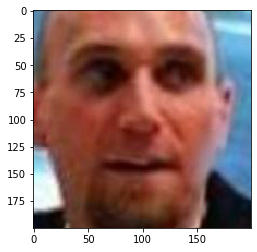

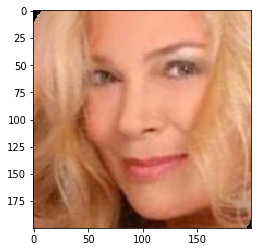

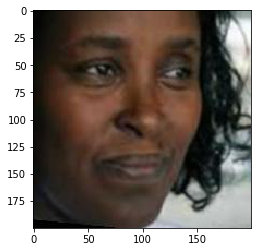

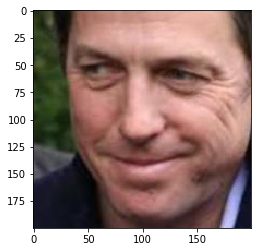

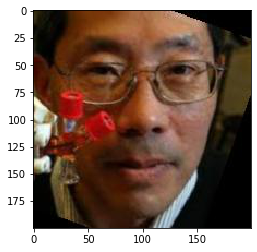

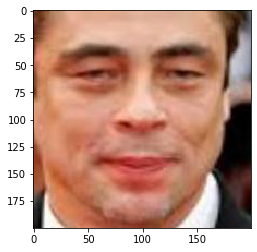

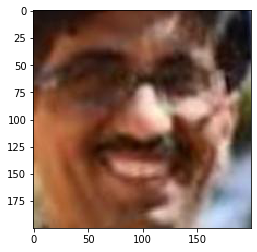

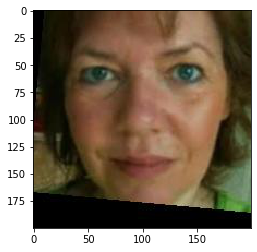

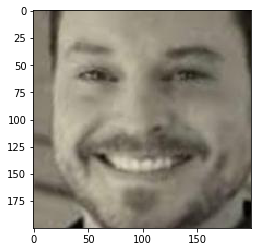

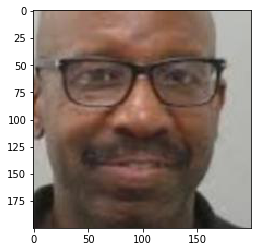

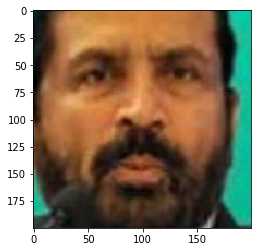

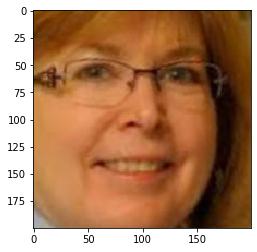

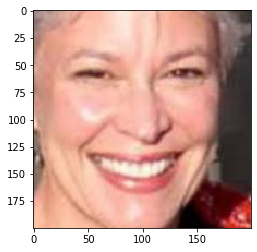

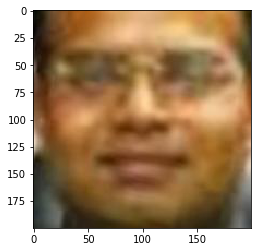

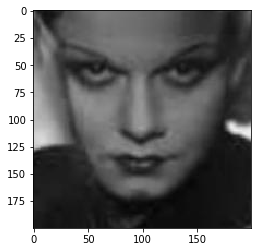

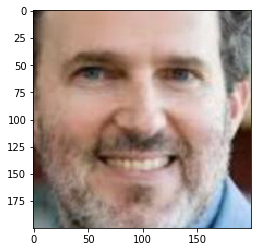

In [166]:
for x, y in testloader:
    print(x.shape)
    print(y.shape)
    print(y)
    break

# vis
for i in range(16):
    plt.imshow(np.transpose(x[i,:], (1,2,0))) # 30 x 30 x 3
    plt.show()

In [167]:
all_gt = []
all_pred = []

for x, y in tqdm.tqdm(testloader):
    optimizer.zero_grad() # clear (reset) the gradient for the optimizer
    all_gt += list(y.numpy().reshape(-1))
    pred = torch.argmax(m(x), dim=1)
    all_pred += list(pred.numpy().reshape(-1))




  0%|          | 0/178 [00:00<?, ?it/s]


  1%|          | 1/178 [00:00<00:33,  5.35it/s]


  1%|          | 2/178 [00:00<00:34,  5.16it/s]


  2%|▏         | 3/178 [00:00<00:35,  4.99it/s]


  2%|▏         | 4/178 [00:00<00:35,  4.91it/s]


  3%|▎         | 5/178 [00:01<00:35,  4.83it/s]


  3%|▎         | 6/178 [00:01<00:35,  4.81it/s]


  4%|▍         | 7/178 [00:01<00:35,  4.79it/s]


  4%|▍         | 8/178 [00:01<00:35,  4.79it/s]


  5%|▌         | 9/178 [00:01<00:35,  4.73it/s]


  6%|▌         | 10/178 [00:02<00:35,  4.75it/s]


  6%|▌         | 11/178 [00:02<00:35,  4.73it/s]


  7%|▋         | 12/178 [00:02<00:35,  4.71it/s]


  7%|▋         | 13/178 [00:02<00:34,  4.73it/s]


  8%|▊         | 14/178 [00:02<00:34,  4.71it/s]


  8%|▊         | 15/178 [00:03<00:34,  4.68it/s]


  9%|▉         | 16/178 [00:03<00:34,  4.70it/s]


 10%|▉         | 17/178 [00:03<00:34,  4.73it/s]


 10%|█         | 18/178 [00:03<00:33,  4.72it/s]


 11%|█         | 19/178 [00:04<00:33,  4.74it/

 76%|███████▋  | 136/178 [00:29<00:08,  4.67it/s]


 77%|███████▋  | 137/178 [00:29<00:08,  4.67it/s]


 78%|███████▊  | 138/178 [00:29<00:08,  4.66it/s]


 78%|███████▊  | 139/178 [00:29<00:08,  4.69it/s]


 79%|███████▊  | 140/178 [00:29<00:08,  4.70it/s]


 79%|███████▉  | 141/178 [00:30<00:07,  4.74it/s]


 80%|███████▉  | 142/178 [00:30<00:07,  4.80it/s]


 80%|████████  | 143/178 [00:30<00:07,  4.80it/s]


 81%|████████  | 144/178 [00:30<00:07,  4.78it/s]


 81%|████████▏ | 145/178 [00:30<00:06,  4.79it/s]


 82%|████████▏ | 146/178 [00:31<00:06,  4.80it/s]


 83%|████████▎ | 147/178 [00:31<00:06,  4.80it/s]


 83%|████████▎ | 148/178 [00:31<00:06,  4.81it/s]


 84%|████████▎ | 149/178 [00:31<00:06,  4.78it/s]


 84%|████████▍ | 150/178 [00:32<00:05,  4.79it/s]


 85%|████████▍ | 151/178 [00:32<00:05,  4.77it/s]


 85%|████████▌ | 152/178 [00:32<00:05,  4.72it/s]


 86%|████████▌ | 153/178 [00:32<00:05,  4.70it/s]


 87%|████████▋ | 154/178 [00:32<00:05,  4.71it/s]


 87%|███████

In [168]:
print(all_gt)
print(all_pred)

[3, 1, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 0, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 3, 0, 3, 0, 1, 3, 1, 1, 3, 1, 0, 1, 0, 1, 1, 0, 3, 1, 2, 1, 1, 0, 1, 0, 3, 3, 1, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 0, 3, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 3, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 2, 0, 3, 1, 0, 1, 1, 3, 3, 1, 0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 0, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 2, 1, 0, 3, 1, 3, 3, 0, 

In [169]:
acc = np.sum(np.array(all_gt) == np.array(all_pred)) / len(all_gt)
print("Accuracy is:", acc)

Accuracy is: 0.7089499647639183
